In [144]:
from functions import *

In [145]:
T = 1
n = 3

In [146]:
gamma_lims = (0.2, 2)
gamma_steps = 200
time_lims = (0,10)
time_steps = 200

gamma_range = np.linspace(gamma_lims[0], gamma_lims[1], gamma_steps)
time_range = np.linspace(time_lims[0], time_lims[1], time_steps)

num_random_models = 10

delta_quantum_arr = np.zeros((time_steps, gamma_steps, num_random_models))
delta_mismatched_quantum_arr = np.zeros((time_steps, gamma_steps, num_random_models))

for t_id, t in enumerate(time_range):
    for gamma_id, gamma in enumerate(gamma_range):
        np.random.seed(0) # set the seed for reproducibility
        for i in range(num_random_models):
            m = RandomIsingModel(n)

            proposal_mat_quantum = get_proposal_mat_quantum(m, gamma, t)
            P_quantum = get_transition_matrix(m, T, proposal_mat_quantum)
            delta_quantum = get_delta(P_quantum)
            delta_quantum_arr[t_id, gamma_id, i] = delta_quantum

            m_mismatched = RandomIsingModel(n)
            proposal_mat_mismatched_quantum = get_proposal_mat_quantum(m_mismatched, gamma, t)
            P_mismatched_quantum = get_transition_matrix(m, T, proposal_mat_mismatched_quantum)
            delta_mismatched_quantum = get_delta(P_mismatched_quantum)
            delta_mismatched_quantum_arr[t_id, gamma_id, i] = delta_mismatched_quantum
    clear_output(wait=True)
    display(f'Finished {t_id+1} / {time_steps} time steps.')

'Finished 200 / 200 time steps.'

In [159]:
# pickle.dump(delta_mismatched_quantum_arr, open('delta_mismatched_quantum_arr_n3.p','wb'))
# d = pickle.load(open('delta_quantum_arr_n3.p','rb'))
# d_mis = pickle.load(open('delta_mismatched_quantum_arr_n3.p','rb'))

In [147]:
delta_quantum_arr_avg = np.mean(delta_quantum_arr, axis=2)
delta_quantum_arr_std = np.std(delta_quantum_arr, axis=2)

delta_mismatched_quantum_arr_avg = np.mean(delta_mismatched_quantum_arr, axis=2)
delta_mismatched_quantum_arr_std = np.std(delta_mismatched_quantum_arr, axis=2)

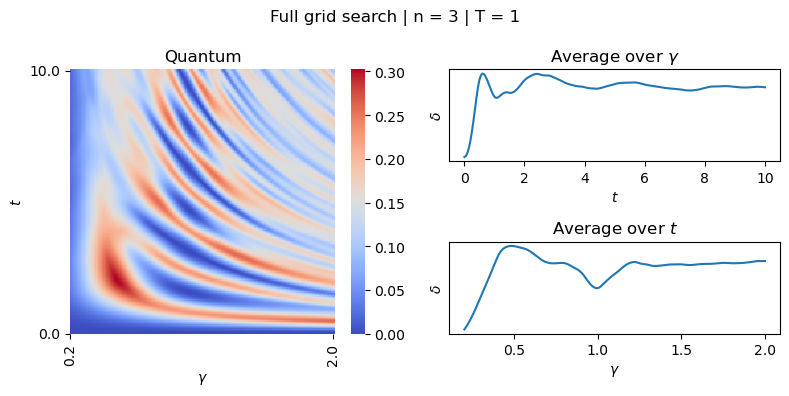

In [155]:
fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                               ['left', 'lower right']],
                              figsize=(8, 4))
fig.suptitle(f'Full grid search | n = {n} | T = {T}')
sns.heatmap(delta_quantum_arr_avg, 
            vmin=0,
            cmap='coolwarm',
            ax=axs['left'])
axs['left'].invert_yaxis()

pc0 = axs[0].pcolor(x, y, np.array(c_assignment).T, cmap='coolwarm', vmin=75)

axs['left'].set_yticks([0,time_steps-1], labels=time_range[[0,time_steps-1]])
axs['left'].set_xticks([0,gamma_steps-1], labels=gamma_range[[0,gamma_steps-1]])
axs['left'].set_xlabel('$\gamma$')
axs['left'].set_ylabel('$t$')
axs['left'].set_title('Quantum')

# axs['left'].set_yscale('log')
# axs['left'].set_xscale('log')

axs['upper right'].plot(time_range, np.mean(delta_quantum_arr_avg, axis=1))
axs['upper right'].set_xlabel('$t$')
axs['upper right'].set_ylabel('$\delta$')
axs['upper right'].set_yticks([])
axs['upper right'].set_title('Average over $\gamma$')

axs['lower right'].plot(gamma_range, np.mean(delta_quantum_arr_avg, axis=0))
axs['lower right'].set_xlabel('$\gamma$')
axs['lower right'].set_ylabel('$\delta$')
axs['lower right'].set_yticks([])
axs['lower right'].set_title('Average over $t$')

fig.tight_layout()

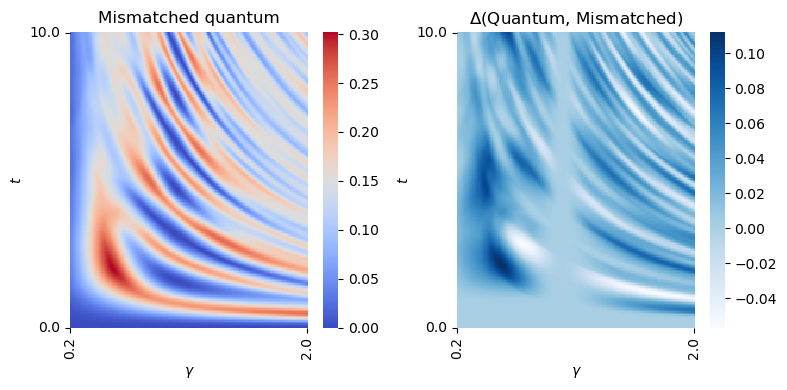

In [149]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.heatmap(delta_quantum_arr_avg,             
            vmin=0,
            cmap='coolwarm',
            ax=axs[0])
axs[0].invert_yaxis()
sns.heatmap(delta_quantum_arr_avg - delta_mismatched_quantum_arr_avg,
            cmap='Blues',
            ax=axs[1])
axs[1].invert_yaxis()

axs[0].set_yticks([0,time_steps-1], labels=time_range[[0,time_steps-1]])
axs[0].set_xticks([0,gamma_steps-1], labels=gamma_range[[0,gamma_steps-1]])
axs[0].set_ylabel('$t$')
axs[0].set_xlabel('$\gamma$')
axs[0].set_title('Mismatched quantum')

axs[1].set_yticks([0,time_steps-1], labels=time_range[[0,time_steps-1]])
axs[1].set_xticks([0,gamma_steps-1], labels=gamma_range[[0,gamma_steps-1]])
axs[1].set_ylabel('$t$')
axs[1].set_xlabel('$\gamma$')
axs[1].set_title('$\Delta$(Quantum, Mismatched)')

fig.tight_layout()